In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [80]:
def capture_image(device_path):
    # Open camera with specific device path
    cap = cv2.VideoCapture(device_path)

    # Check if camera opened successfully
    if not cap.isOpened():
        print("Error opening video stream or file")
        return None

    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame was not captured successfully, return None
    if not ret:
        print("Error capturing frame")
        cap.release()
        return None

    # Release the camera
    cap.release()

    # Convert frame to image format
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Return the captured image
    return image


In [81]:
device = 1
size_per_square = 1
checkerboard_shape = (6,8)

In [82]:
image = capture_image(device)

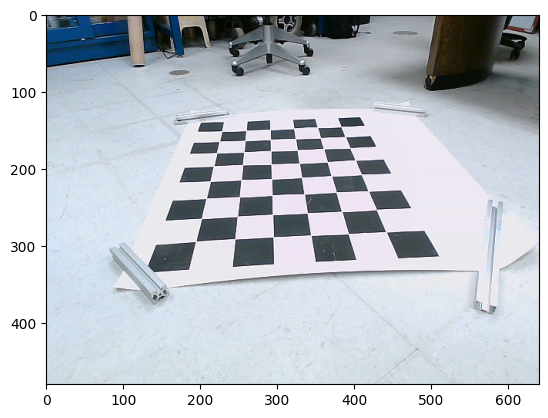

In [83]:
plt.imshow(image)

In [84]:
ret, corners = cv2.findChessboardCorners(image, checkerboard_shape, None)
print(ret)

True


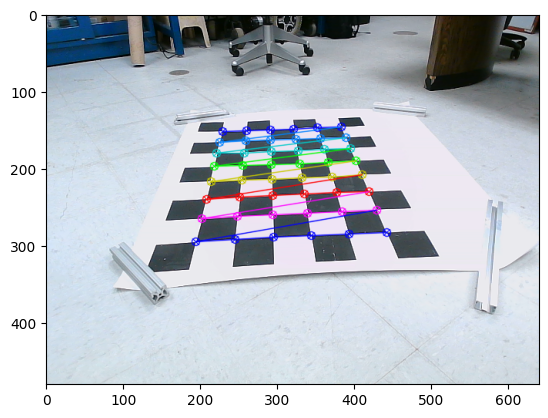

In [85]:
plt.imshow(cv2.drawChessboardCorners(image.copy(), checkerboard_shape, corners, ret))

In [86]:
corners[0][0]

array([228.56207, 152.23573], dtype=float32)

In [87]:
image_cp = image.copy()

# Extract the four corner points
top_left = tuple(corners[0][0])
top_right = tuple(corners[5][0])
bottom_left = tuple(corners[42][0])
bottom_right = tuple(corners[47][0])

# Create NumPy array of corner points
points = np.array([top_left, bottom_left, bottom_right,top_right], dtype=np.float32)



In [88]:
points

array([[228.56207, 152.23573],
       [194.46907, 294.98645],
       [441.84302, 282.74802],
       [383.1072 , 146.29936]], dtype=float32)

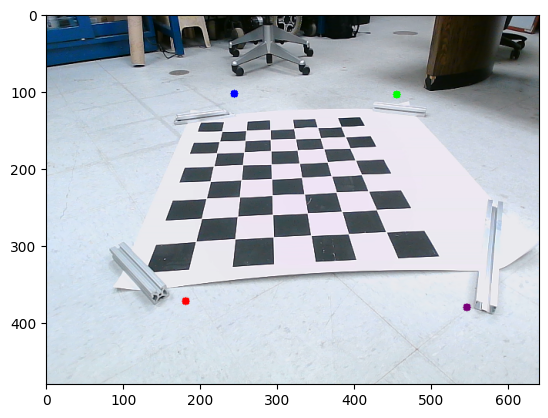

In [89]:
#Draw the points
cv2.circle(image_cp, (244, 103), radius=5, color=(0, 0, 255), thickness=-1)
cv2.circle(image_cp, (455, 104), radius=5, color=(0, 255, 0), thickness=-1)
cv2.circle(image_cp, (181, 372), radius=5, color=(255, 0, 0), thickness=-1)
cv2.circle(image_cp, (546, 380), radius=5, color=(120, 0, 120), thickness=-1)

plt.imshow(image_cp)

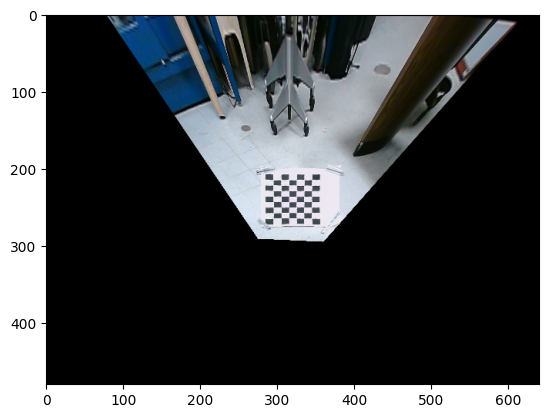

In [90]:
size = 25

y_mid = image.shape[0] / 2
x_mid = image.shape[1] / 2
# compute IPM matrix and apply it
                   # 
ipm_pts = np.array([[x_mid - size, y_mid - size],[x_mid - size, y_mid + size],[x_mid + size, y_mid + size],[x_mid + size, y_mid - size]], dtype=np.float32)
ipm_matrix = cv2.getPerspectiveTransform(points, ipm_pts)
ipm = cv2.warpPerspective(image, ipm_matrix, image.shape[:2][::-1])
plt.imshow(ipm)

In [91]:
ipm_matrix

array([[ 1.05871404e+00,  4.07694223e+00,  3.49800147e+01],
       [ 1.22717040e-01,  4.53027334e+00, -6.35216735e+01],
       [ 2.61733200e-04,  1.30255301e-02,  1.00000000e+00]])

In [92]:
cap = cv2.VideoCapture(device)

# Start capturing frames from the camera
while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Apply IPM transformation to the frame
    ipm = cv2.warpPerspective(frame, ipm_matrix, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    # Display the transformed frame
    cv2.imshow('IPM Video', ipm)
    cv2.imshow("original",frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture device and destroy all windows
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

3

In [ ]:
# Get the parent directory of the current working directory
parent_dir = os.path.split(os.getcwd())[0]
# Join the parent directory with other path elements
new_path = os.path.join(parent_dir, f"calibration_data/video2.txt")

with open(new_path, 'w') as f:
    for i in range(ipm_matrix.shape[0]):
        for j in range(ipm_matrix.shape[1]):
            f.write(f'{float(ipm_matrix[i][j]):.15f}'.format() + " ")
        f.write("\n")
            
        #
    #f.write(str(checkerboard_shape*size_per_square))

    